In [1]:
import pandas as pd
from sklearn import *
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [4]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [22]:
target = "default"
X = df.drop(columns=[target]) # Features

# Label encoder converts the categorical values into indices (int)
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(df[target]) # Label/outcome/target


# One hot Encoding - converts the categorical data into numeric
X = pd.get_dummies(X, drop_first=True)
features = X.columns

# X.values returns numpy array for the dataframe
# astype converts each feature to floating point number
X = X.values.astype("float")

# Divide the dataset into training and test
# Model is trained on training set 
# Model is evaluated on the test set
# Model has not seen the test data and assuming test records is a good 
# representation of future, we can get an idea how the model will perform
# in production
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)



pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=2
    #                                          , include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=10))
])


pipe.fit(X_train, y_train) 
# training is happening to build the model
# Essetially, the coefficients/weights/parameters values are calculated

# Doing the prediction
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


print("training accuracy:"
      , metrics.accuracy_score(y_train, y_train_pred))

print("test accuracy:"
      , metrics.accuracy_score(y_test, y_test_pred))

print(metrics.confusion_matrix(y_test, y_test_pred))

training accuracy: 0.7471428571428571
test accuracy: 0.74
[[193  21]
 [ 57  29]]


In [23]:
est = pipe.steps[-1][-1]

In [24]:
from sklearn.tree import export_graphviz
export_graphviz(est, out_file = "tree.dot", feature_names = features
                , filled=True)
!dot -Tpng tree.dot -o tree.png


In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'ROC, auc: 0.7263094979352314')

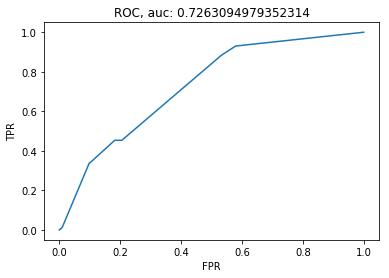

In [44]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: " + str(auc))

In [49]:
pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=2
    #                                          , include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier(random_state=1))
])

param_grid = {
    "est__criterion": ["gini", "entropy"],
    "est__max_depth": np.arange(5, 15),
    "est__min_samples_leaf": np.arange(5, 20)
}

gsearch = model_selection.GridSearchCV(pipe, param_grid
                                       , cv = 5, verbose = True)

gsearch.fit(X, y)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    4.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('est', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'est__criterion': ['gini', 'entropy'], 'est__max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'est__min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [50]:
gsearch.best_params_, gsearch.best_score_

({'est__criterion': 'gini', 'est__max_depth': 10, 'est__min_samples_leaf': 11},
 0.735)

In [25]:
0.425 - (424 * 0.488 + 276 * 0.221)/700

0.04227428571428571

In [28]:
df_train = pd.DataFrame(X_train, columns=features)
df_train["default"] = y_train
df_train.head()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,dependents,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,...,installment_plan_none,installment_plan_stores,housing_own,housing_rent,telephone_yes,foreign_worker_yes,job_skilled employee,job_unemployed non-resident,job_unskilled resident,default
0,24.0,1987.0,2.0,4.0,21.0,1.0,2.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1
1,30.0,3077.0,3.0,2.0,40.0,2.0,2.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0
2,18.0,750.0,4.0,1.0,27.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,12.0,7472.0,1.0,2.0,24.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
4,18.0,4380.0,3.0,4.0,35.0,1.0,2.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0


In [30]:
df_train.query("months_loan_duration < 22.5").default.value_counts()

0    310
1     97
Name: default, dtype: int64

In [38]:
n1 = 310 + 97
n1

407

In [31]:
p1 = 310/(310+97)
p1

0.7616707616707616

In [32]:
g1 = 2 * p1 * (1-p1)

In [33]:
df_train.query("months_loan_duration >= 22.5").default.value_counts()

0    176
1    117
Name: default, dtype: int64

In [37]:
n2 = 176 + 117
n2

293

In [34]:
p1 = 117/(117+176)
p1

0.3993174061433447

In [35]:
g2 = 2*p1*(1-p1)
g2

0.47972603058859165

In [39]:
0.424 - (n1 * g1 + n2* g2)/(n1+n2)

0.012108778962021227

In [43]:
summary = pd.DataFrame({"feature": features
                , "importance":est.feature_importances_})
summary.sort_values("importance", ascending = False)

,feature,importance
9,checking_balance_unknown,0.533473
0,months_loan_duration,0.183929
24,savings_balance_< 100 DM,0.086350
11,credit_history_fully repaid,0.085644
39,installment_plan_none,0.060633
35,other_debtors_none,0.027046
27,employment_length_1 - 4 yrs,0.022925
36,property_other,0.000000
28,employment_length_4 - 7 yrs,0.000000
29,employment_length_> 7 yrs,0.000000


In [54]:
pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=2
    #                                          , include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", ensemble.RandomForestClassifier(random_state=1))
])

param_grid = {
    #"est__max_features": np.linspace(0, 0.8, 10),
    "est__n_estimators": np.arange(1, 10) * 5,
    "est__criterion": ["entropy"],
    "est__max_depth": np.arange(5, 15),
    "est__min_samples_leaf": [8,10,12]
}

gsearch = model_selection.GridSearchCV(pipe, param_grid, n_jobs=8
                                       , cv = 5, verbose = True)

gsearch.fit(X, y)
gsearch.best_params_, gsearch.best_score_

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    4.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    7.8s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   13.1s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:   20.0s
[Parallel(n_jobs=8)]: Done 1350 out of 1350 | elapsed:   21.8s finished


({'est__criterion': 'entropy',
  'est__max_depth': 12,
  'est__min_samples_leaf': 10,
  'est__n_estimators': 30},
 0.742)